## CARGAMOS LOS DATOS

In [1]:
import preprocess_data as pr_data
import pandas as pd
from tensorboard import notebook


In [2]:
from preprocess_data import load_data

In [3]:
%load_ext tensorboard

In [4]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

df=load_data(genres)

## EXTRAEMOS CARACTERÍSTICAS

In [5]:
df=pr_data.extract_mfcc(df)

In [6]:
## Desagregamos los datos
df[['MFCC_1','MFCC_2','MFCC_3', 'MFCC_4', 'MFCC_5', 'MFCC_6', 'MFCC_7', 'MFCC_8', 'MFCC_9', 'MFCC_10',
    'MFCC_11', 'MFCC_12', 'MFCC_13', 'MFCC_14', 'MFCC_15', 'MFCC_16', 'MFCC_17', 'MFCC_18', 'MFCC_19', 
    'MFCC_20']] = pd.DataFrame(df.MFCC.values.tolist(), index= df.index)

df = df.drop(['MFCC'], axis = 1)

## MODELO DENSE

In [7]:
from model import Model

Using TensorFlow backend.


=======================] - 0s 7ms/step - loss: 0.9676 - accuracy: 0.6672 - val_loss: 1.1862 - val_accuracy: 0.5667

Epoch 00530: val_accuracy did not improve from 0.59333
Epoch 531/1000
10/10 [==============================] - 0s 8ms/step - loss: 1.0256 - accuracy: 0.6364 - val_loss: 1.1866 - val_accuracy: 0.5800

Epoch 00531: val_accuracy did not improve from 0.59333
Epoch 532/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.9988 - accuracy: 0.6940 - val_loss: 1.1873 - val_accuracy: 0.5800

Epoch 00532: val_accuracy did not improve from 0.59333
Epoch 533/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.9522 - accuracy: 0.6707 - val_loss: 1.1872 - val_accuracy: 0.5800

Epoch 00533: val_accuracy did not improve from 0.59333
Epoch 534/1000
10/10 [==============================] - 0s 8ms/step - loss: 0.8704 - accuracy: 0.7024 - val_loss: 1.1863 - val_accuracy: 0.5800

Epoch 00534: val_accuracy did not improve from 0.59333
Epoch 535/1000
10/10 [=======

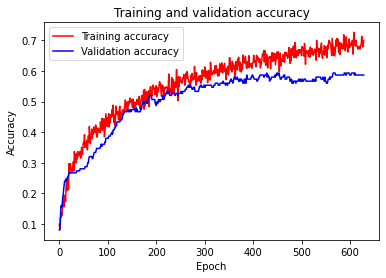

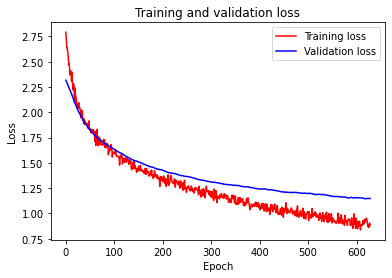

In [14]:
model_pr=Model('DENSE',df,1000,patience=200)

##Preprocesamos los datos para la LSTM

model_pr.preprocess_DENSE()

### Entrenamos el modelo

model_pr.train()

In [15]:
%tensorboard --logdir logs_DENSE


In [16]:
notebook.list() # Listamos los tensorboards que tenemos

Known TensorBoard instances:
  - port 6006: logdir logs_DENSE (started 0:00:02 ago; pid 1418)


In [17]:
## Escogemos el tensorboard para este caso
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir logs_DENSE (started 0:00:06 ago; port 6006, pid 1418).


## MODELO LSTM

In [7]:
from model import Model

Using TensorFlow backend.


1 - val_loss: 1.6111 - val_accuracy: 0.4933

Epoch 00901: val_accuracy did not improve from 0.51333
Epoch 902/1000
10/10 [==============================] - 0s 17ms/step - loss: 1.1465 - accuracy: 0.5964 - val_loss: 1.6555 - val_accuracy: 0.4933

Epoch 00902: val_accuracy did not improve from 0.51333
Epoch 903/1000
10/10 [==============================] - 0s 17ms/step - loss: 1.2220 - accuracy: 0.5599 - val_loss: 1.6204 - val_accuracy: 0.4933

Epoch 00903: val_accuracy did not improve from 0.51333
Epoch 904/1000
10/10 [==============================] - 0s 17ms/step - loss: 1.1649 - accuracy: 0.5851 - val_loss: 1.6577 - val_accuracy: 0.4933

Epoch 00904: val_accuracy did not improve from 0.51333
Epoch 905/1000
10/10 [==============================] - 0s 17ms/step - loss: 1.1963 - accuracy: 0.5848 - val_loss: 1.6253 - val_accuracy: 0.4867

Epoch 00905: val_accuracy did not improve from 0.51333
Epoch 906/1000
10/10 [==============================] - 0s 16ms/step - loss: 1.1735 - accuracy: 

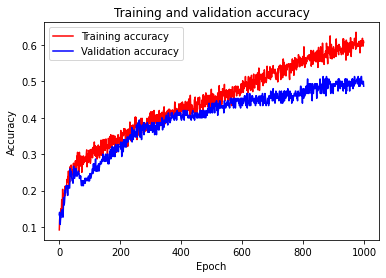

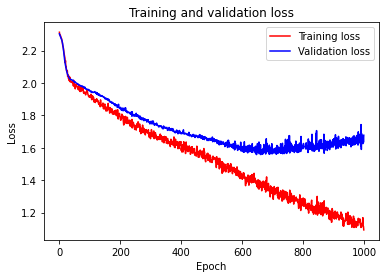

In [20]:
model_pr=Model('LSTM',df,1000,patience=300)

##Preprocesamos los datos para la LSTM

model_pr.preprocess_LSTM()

### Entrenamos el modelo

model_pr.train()

In [9]:
%tensorboard --logdir logs_LSTM


Reusing TensorBoard on port 6006 (pid 16433), started 5:24:03 ago. (Use '!kill 16433' to kill it.)

In [10]:
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs (started 5:46:06 ago; pid 16161)
  - port 6006: logdir /path/to/log/folder (started 7:54:32 ago; pid 13959)
  - port 6006: logdir logs_LSTM (started 5:24:07 ago; pid 16433)
  - port 6007: logdir logs_CNN (started 5:18:16 ago; pid 16505)


In [11]:
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir logs_LSTM (started 5:24:13 ago; port 6006, pid 16433).


## MODELO CNN

In [9]:
from model import Model

In [10]:
model_cnn=Model('CNN',df,10)


In [11]:
## Hacemos que cargue el x_train y el y_train,...
model_cnn.preprocess_CNN()


Epoch 1/10
13/13 [==============================] - 27s 2s/step - loss: 4.3858 - accuracy: 0.0844 - val_loss: 3.2204 - val_accuracy: 0.0900

Epoch 00001: val_accuracy improved from -inf to 0.09000, saving model to best_model_CNN.h5
Epoch 2/10
13/13 [==============================] - 26s 2s/step - loss: 3.7834 - accuracy: 0.1591 - val_loss: 3.0250 - val_accuracy: 0.0650

Epoch 00002: val_accuracy did not improve from 0.09000
Epoch 3/10
13/13 [==============================] - 26s 2s/step - loss: 3.6391 - accuracy: 0.1795 - val_loss: 2.7074 - val_accuracy: 0.0700

Epoch 00003: val_accuracy did not improve from 0.09000
Epoch 4/10
13/13 [==============================] - 26s 2s/step - loss: 3.5742 - accuracy: 0.1693 - val_loss: 2.4221 - val_accuracy: 0.1550

Epoch 00004: val_accuracy improved from 0.09000 to 0.15500, saving model to best_model_CNN.h5
Epoch 5/10
13/13 [==============================] - 26s 2s/step - loss: 3.3452 - accuracy: 0.1915 - val_loss: 2.1012 - val_accuracy: 0.2100



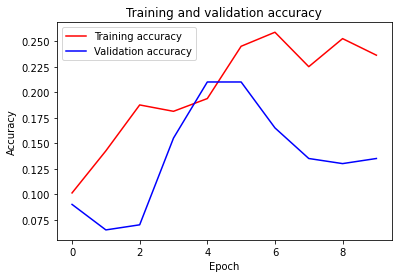

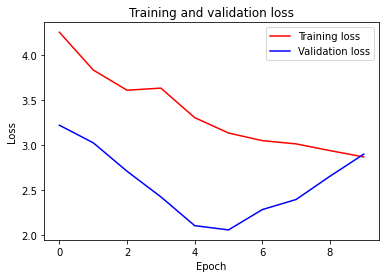

In [12]:
model_cnn.train()

In [13]:
%tensorboard --logdir logs_CNN


In [14]:
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs_DENSE (started 0:45:38 ago; pid 1418)
  - port 6006: logdir logs_CNN (started 0:00:02 ago; pid 2081)


In [15]:
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir logs_CNN (started 0:00:05 ago; port 6006, pid 2081).


## MODELO CNN Y LSTM

In [65]:
import keras
from tensorflow.keras.layers import Input ,Dense, Dropout, Activation, LSTM
from tensorflow.keras.layers import Lambda, Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.optimizers import SGD
from keras.utils import np_utils
from tensorflow.keras.models import Model
import keras.backend as K


import numpy as np

timesteps=100
number_of_samples=2500
nb_samples=number_of_samples
frame_row=32
frame_col=32
channels=3

nb_epoch=1
batch_size=timesteps

data= np.random.random((2500,timesteps,frame_row,frame_col,channels))
label=np.random.random((2500,timesteps,1))

X_train=data[0:2000,:]
y_train=label[0:2000]

X_test=data[2000:,:]
y_test=label[2000:,:]

#%%

model=Sequential();                          

model.add(TimeDistributed(Conv2D(filters=32, kernel_size=3), input_shape=(32,50,1320,1)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(Conv2D(32, 3, 3)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.25)))

model.add(TimeDistributed(Flatten()))
model.add(TimeDistributed(Dense(512)))
#output dimension here is (None, 100, 512)                

model.add(TimeDistributed(Dense(35, name="first_dense" )))
#output dimension here is (None, 100, 35)                


model.add(LSTM(128,return_sequences=False))
#output dimension here is (None, 100, 20)

time_distributed_merge_layer = Lambda(function=lambda x: K.mean(x, axis=0, keepdims=False) , output_shape=(None, 20)) 

model.add(time_distributed_merge_layer)
#output dimension here is (None, 1, 20)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid', input_shape=(None,20)))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [66]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_122 (TimeDi (None, 32, 48, 1318, 32)  320       
_________________________________________________________________
time_distributed_123 (TimeDi (None, 32, 48, 1318, 32)  0         
_________________________________________________________________
time_distributed_124 (TimeDi (None, 32, 16, 439, 32)   9248      
_________________________________________________________________
time_distributed_125 (TimeDi (None, 32, 16, 439, 32)   0         
_________________________________________________________________
time_distributed_126 (TimeDi (None, 32, 8, 219, 32)    0         
_________________________________________________________________
time_distributed_127 (TimeDi (None, 32, 8, 219, 32)    0         
_________________________________________________________________
time_distributed_128 (TimeDi (None, 32, 56064)       